***

# <span style='background:yellow; font-family:Georgia'> FINAL PROJECT: Inequality and Underdevelopment under Imperial Manila Syndrome in the Philippines <span style='background:yellow; font-family:Georgia'>

<span style='color:green'> Submitted by: DATA100 S11 Group 3 <span style='color:green'>

<span style='color:green'> Ma. Katrina Isabela Cansana, Kate Alexandra Fabro, Samuel Jacob Pascual, Cara Isabel Del Rosario & Michael Dave Que <span style='color:green'>

*** 

# Introduction

Ever since the conceptualization of the Philippines as a sovereign state, blame on the lack of progress in rural areas has been significantly attributed to the phenomenon of 'Imperial Manila syndrome,’ where the country's focus on development has been heavily centered around the capital city. It causes the national government and lawmakers to prioritize economic growth in Manila and its nearby regions in exchange for the welfare for provinces situated farther away from the capital. 

Therefore, this study seeks to explore this concept's validity by examining the characteristics or, more specifically economic, infrastructural, and innovative nuances of areas, in relation to their proximity to Manila. Using data on the five pillars of the competitive index from the Cities and Municipalities Competitive Index across the 114 component cities in the Philippines, the study aims to answer the following research question: How does geocentric distance from Metro Manila influence the competitiveness of component cities?

# List of Requirements

Dataset: https://docs.google.com/spreadsheets/d/1swogGWltTNOKpbK3MnTN51oAXjSTrzV1nntj5t2JoOE/edit?usp=sharing

Python Libraries: NumPy, Pandas, Matplotlib Pyplot, Statsmodels API & Seaborn

# Data Preprocessing & Cleaning

In this section, the data, which was collected from the Cities and Municipalities Competitive Index and DistanceFromTo Calculator, was preprocessed and cleaned to remove the missing values and rename the columns for better cohesion. Additionally, the data was transformed into a dataframe as well as the variables were checked for their data types for the further usage in the succeeding sections.

In [2]:
# Import required files 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

data = pd.read_excel('./G3 Final Project Dataset.xlsx')

In [3]:
# Check initial data
data 

,RANK,OVERALL SCORE,COMPONENT CITY,PROVINCE,REGION,RANK.1,ECONOMIC DYNAMISM,RANK.2,GOVERNMENT EFFICIENCY,RANK.3,INFRASTRUCTURE,RANK.4,RESILIENCY,RANK.5,INNOVATION,GEOCENTRIC DISTANCE FROM MANILA (IN KM)
0,NaN,NaN,NaN,NaN,NaN,NaN,SCORE,NaN,SCORE,NaN,SCORE,NaN,SCORE,NaN,SCORE,NaN
1,1st,55.5809,Naga (CS),Camarines Sur,REGION V (Bicol Region),4.0,8.0223,5.0,11.355,1.0,10.9492,2.0,14.6966,1.0,10.5578,264.62 km
2,2nd,51.6097,Legazpi,Albay,REGION V (Bicol Region),2.0,8.396,2.0,11.7878,3.0,8.9607,12.0,12.4981,6.0,9.9671,339.64 km
3,3rd,50.4242,Antipolo,Rizal,REGION IV-A (CALABARZON),8.0,6.8841,11.0,11.0591,2.0,9.9004,4.0,13.2978,11.0,9.2828,21.07 km
4,4th,47.9056,Calapan,Oriental Mindoro,REGION IV-B (MIMAROPA),34.0,4.2738,13.0,10.8669,4.0,8.2687,1.0,16.1418,25.0,8.3544,131.89 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110th,28.4628,Bais,Negros Oriental,REGION VII (Central Visayas),108.0,2.1557,95.0,8.3615,107.0,3.3116,107.0,10.4608,100.0,4.1732,602.08 km
111,111th,27.5252,Escalante,Negros Occidental,REGION VI (Western Visayas),114.0,1.4132,104.0,7.4225,101.0,3.5553,105.0,10.6501,94.0,4.4841,498.08 km
112,112th,26.5304,Guihulngan,Negros Oriental,REGION VII (Central Visayas),110.0,1.908,112.0,6.2575,112.0,3.0138,81.0,11.3062,101.0,4.0449,555.41 km
113,113th,26.5277,Canlaon,Negros Oriental,REGION VII (Central Visayas),102.0,2.483,100.0,7.745,114.0,2.0716,113.0,9.1998,90.0,5.0283,526.24 km


In [4]:
# Check dataframe
df = pd.DataFrame(data)
df.columns[0]

'RANK'

`When it comes to data preprocessing, the dataset reflects the diverse characteristics of Philippine cities. It is cleaned thoroughly by eliminating missing rows and values, as well as the columns were renamed for clarity. Furthermore, the variables were checked for its respective data type that is applicable for the processes moving forward. The normalization of competitiveness scores and the inclusion of geocentric distance further enhanced the dataset's normality, ensuring it was primed for robust analysis.`

In [5]:
# Drop missing values 
data = data.dropna()

# Rename columns
pd.options.mode.chained_assignment = None
data.rename(columns={df.columns[6]:'ECONOMIC DYNAMISM SCORE', 
                     df.columns[8]:'GOVERNMENT EFFICIENCY SCORE',
                     df.columns[10]:'INFRASTRUCTURE SCORE',
                     df.columns[12]:'RESILIENCY SCORE',
                     df.columns[14]:'INNOVATION SCORE',}, inplace=True)
data

,RANK,OVERALL SCORE,COMPONENT CITY,PROVINCE,REGION,RANK.1,ECONOMIC DYNAMISM SCORE,RANK.2,GOVERNMENT EFFICIENCY SCORE,RANK.3,INFRASTRUCTURE SCORE,RANK.4,RESILIENCY SCORE,RANK.5,INNOVATION SCORE,GEOCENTRIC DISTANCE FROM MANILA (IN KM)
1,1st,55.5809,Naga (CS),Camarines Sur,REGION V (Bicol Region),4.0,8.0223,5.0,11.355,1.0,10.9492,2.0,14.6966,1.0,10.5578,264.62 km
2,2nd,51.6097,Legazpi,Albay,REGION V (Bicol Region),2.0,8.396,2.0,11.7878,3.0,8.9607,12.0,12.4981,6.0,9.9671,339.64 km
3,3rd,50.4242,Antipolo,Rizal,REGION IV-A (CALABARZON),8.0,6.8841,11.0,11.0591,2.0,9.9004,4.0,13.2978,11.0,9.2828,21.07 km
4,4th,47.9056,Calapan,Oriental Mindoro,REGION IV-B (MIMAROPA),34.0,4.2738,13.0,10.8669,4.0,8.2687,1.0,16.1418,25.0,8.3544,131.89 km
5,5th,47.1808,Tuguegarao,Cagayan,REGION II (Cagayan Valley),26.0,4.7191,1.0,12.9648,10.0,6.4613,6.0,12.9367,5.0,10.0989,346.94 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110th,28.4628,Bais,Negros Oriental,REGION VII (Central Visayas),108.0,2.1557,95.0,8.3615,107.0,3.3116,107.0,10.4608,100.0,4.1732,602.08 km
111,111th,27.5252,Escalante,Negros Occidental,REGION VI (Western Visayas),114.0,1.4132,104.0,7.4225,101.0,3.5553,105.0,10.6501,94.0,4.4841,498.08 km
112,112th,26.5304,Guihulngan,Negros Oriental,REGION VII (Central Visayas),110.0,1.908,112.0,6.2575,112.0,3.0138,81.0,11.3062,101.0,4.0449,555.41 km
113,113th,26.5277,Canlaon,Negros Oriental,REGION VII (Central Visayas),102.0,2.483,100.0,7.745,114.0,2.0716,113.0,9.1998,90.0,5.0283,526.24 km


In [6]:
# Check data & data types to make it consistent for the data processing
geodist = list(data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)'])
geodist
geodist_new = []
for each in geodist:
    if isinstance(each, str) and each.endswith(' km'):
        each = each[:-3]
    geodist_new.append(each)

geodist_new
data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)'] = geodist_new
variables_to_float = ['ECONOMIC DYNAMISM SCORE','GOVERNMENT EFFICIENCY SCORE','INFRASTRUCTURE SCORE',
                      'RESILIENCY SCORE','INNOVATION SCORE','GEOCENTRIC DISTANCE FROM MANILA  (IN KM)']
for each in variables_to_float:
    data[each] = data[each].astype(float)

data.dtypes
data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)']
data

,RANK,OVERALL SCORE,COMPONENT CITY,PROVINCE,REGION,RANK.1,ECONOMIC DYNAMISM SCORE,RANK.2,GOVERNMENT EFFICIENCY SCORE,RANK.3,INFRASTRUCTURE SCORE,RANK.4,RESILIENCY SCORE,RANK.5,INNOVATION SCORE,GEOCENTRIC DISTANCE FROM MANILA (IN KM)
1,1st,55.5809,Naga (CS),Camarines Sur,REGION V (Bicol Region),4.0,8.0223,5.0,11.3550,1.0,10.9492,2.0,14.6966,1.0,10.5578,264.62
2,2nd,51.6097,Legazpi,Albay,REGION V (Bicol Region),2.0,8.3960,2.0,11.7878,3.0,8.9607,12.0,12.4981,6.0,9.9671,339.64
3,3rd,50.4242,Antipolo,Rizal,REGION IV-A (CALABARZON),8.0,6.8841,11.0,11.0591,2.0,9.9004,4.0,13.2978,11.0,9.2828,21.07
4,4th,47.9056,Calapan,Oriental Mindoro,REGION IV-B (MIMAROPA),34.0,4.2738,13.0,10.8669,4.0,8.2687,1.0,16.1418,25.0,8.3544,131.89
5,5th,47.1808,Tuguegarao,Cagayan,REGION II (Cagayan Valley),26.0,4.7191,1.0,12.9648,10.0,6.4613,6.0,12.9367,5.0,10.0989,346.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110th,28.4628,Bais,Negros Oriental,REGION VII (Central Visayas),108.0,2.1557,95.0,8.3615,107.0,3.3116,107.0,10.4608,100.0,4.1732,602.08
111,111th,27.5252,Escalante,Negros Occidental,REGION VI (Western Visayas),114.0,1.4132,104.0,7.4225,101.0,3.5553,105.0,10.6501,94.0,4.4841,498.08
112,112th,26.5304,Guihulngan,Negros Oriental,REGION VII (Central Visayas),110.0,1.9080,112.0,6.2575,112.0,3.0138,81.0,11.3062,101.0,4.0449,555.41
113,113th,26.5277,Canlaon,Negros Oriental,REGION VII (Central Visayas),102.0,2.4830,100.0,7.7450,114.0,2.0716,113.0,9.1998,90.0,5.0283,526.24


# Exploratory Analysis & Feature Extraction

In this section, the data is further represented visually through descriptive statistics to acquire a picture of the dataset. Through illustrating such, the descriptive statistics aids in the analysis of each pillar and the overall score towards the geocentric distance from manila of each component city. 

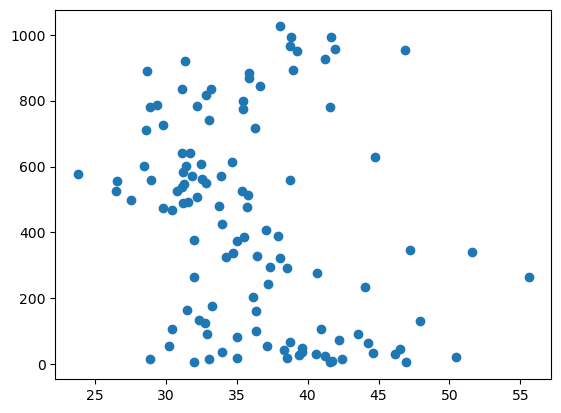

In [7]:
# Create scatter plot 
plt.scatter(data['OVERALL SCORE'],
        data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)'])

`Upon the initial extrapolation of data, we can see in the histogram that each score for component cities correspond roughly to twenty percent of the overall score. The scatter plot generated from the overall competitiveness index score to the geocentric distance from Manila shows that there is no clear correlation between the two variables. From the initial descriptive statistics, the findings declare that the distance from Manila does not have any significant influence as to how development is progressing in cities other than the capital. However, this should not be taken at face value and that this initial result will yet be confirmed through inferential statistics. Additionally, the density plots in the annex portion of the study shows that each data are somewhat normally distributed but are positively skewed. Only geocentric distance and innovation show irregularities with its distribution as the distribution seems to be platykurtic.`

<BarContainer object of 114 artists>

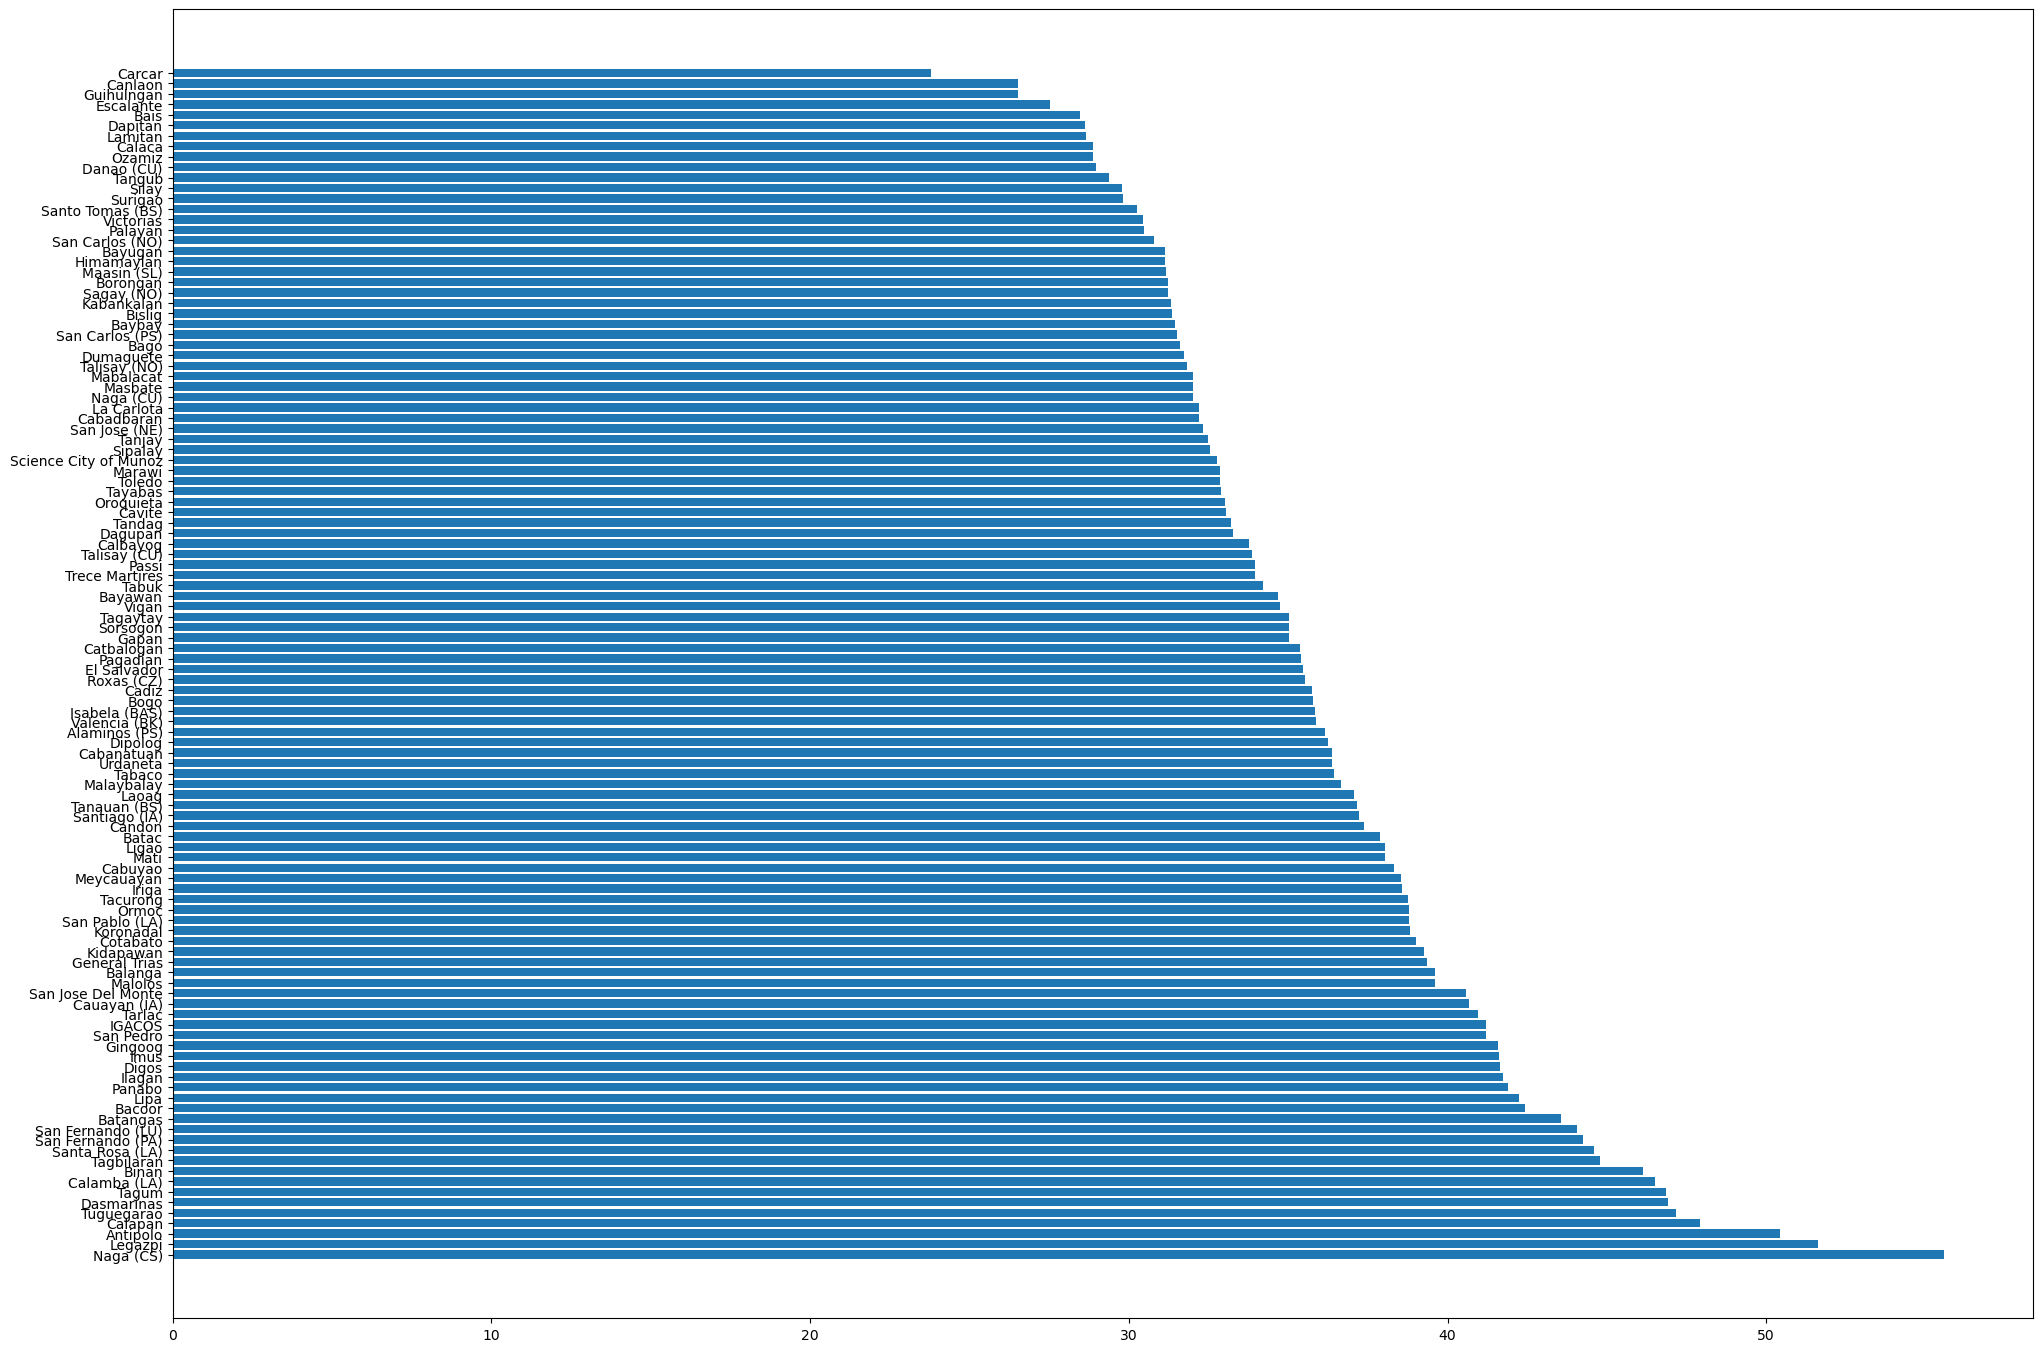

In [8]:
# Check overall score across component cities
labels = [str(x) for x in data]
positions = np.arange(len(data)) + 0.5
plt.figure(num=None, figsize=(24, 17))
plt.barh(data['COMPONENT CITY'],
        data['OVERALL SCORE'])

`Moving forward, to better understand the data, the following graphs have been generated. Specifically, the density plot was conducted for each of the score for economic dynamism, government efficiency, infrastructure, resiliency, innovation and overall as well as the geocentric distance from manila in kilometers. This contributed to gaining an overview of the data and its distribution.`

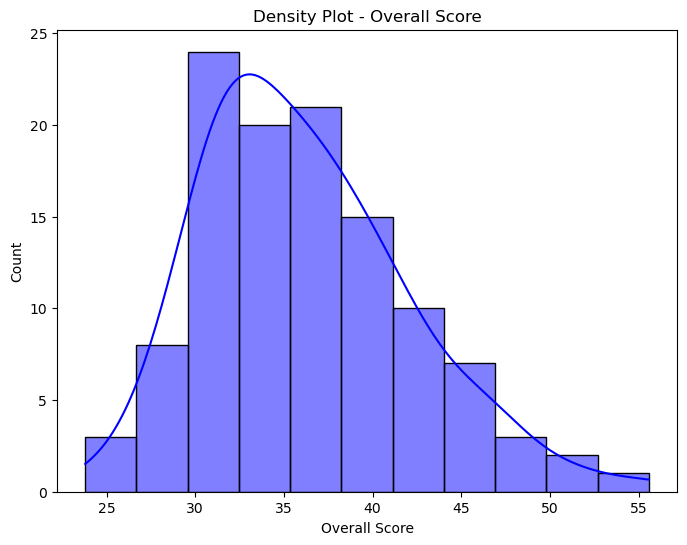

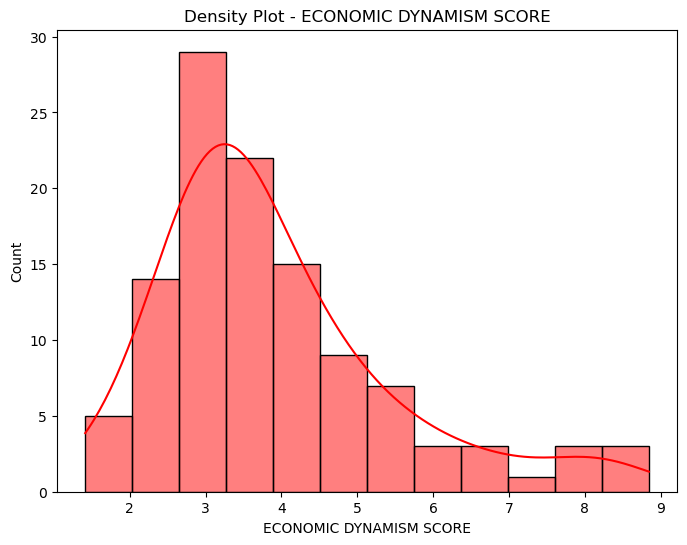

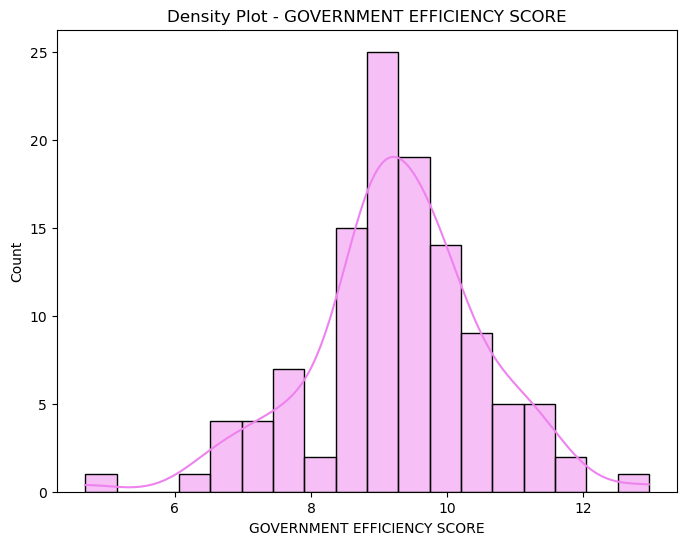

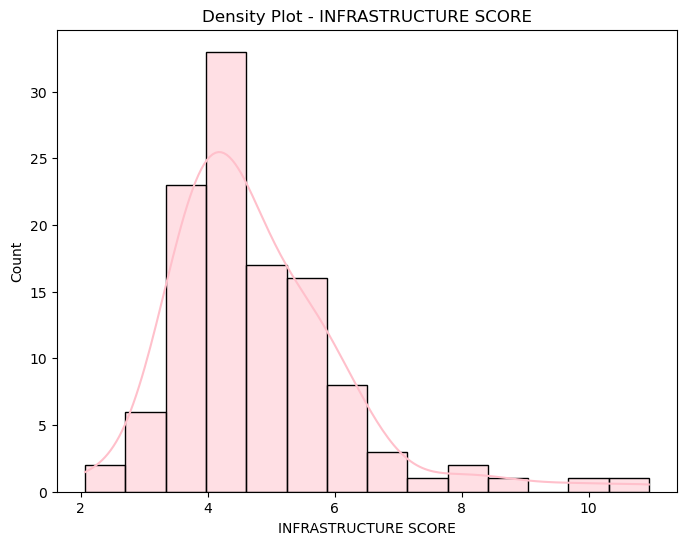

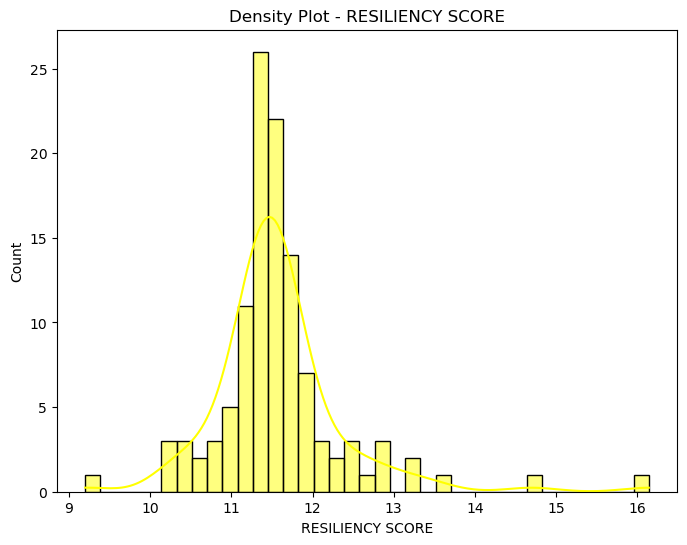

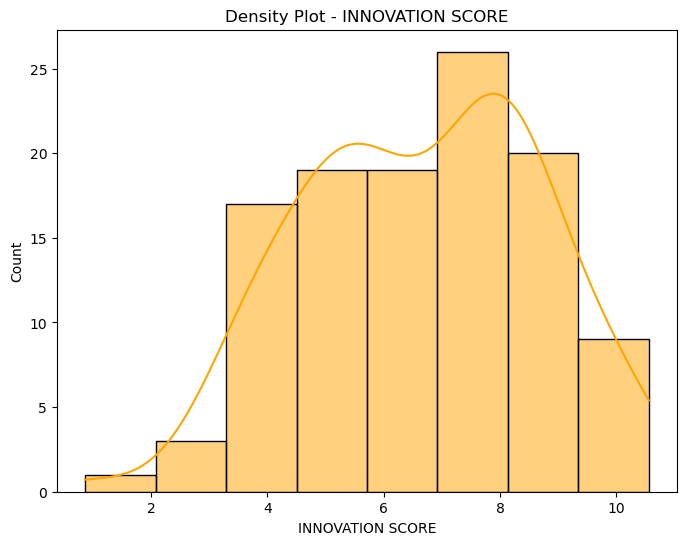

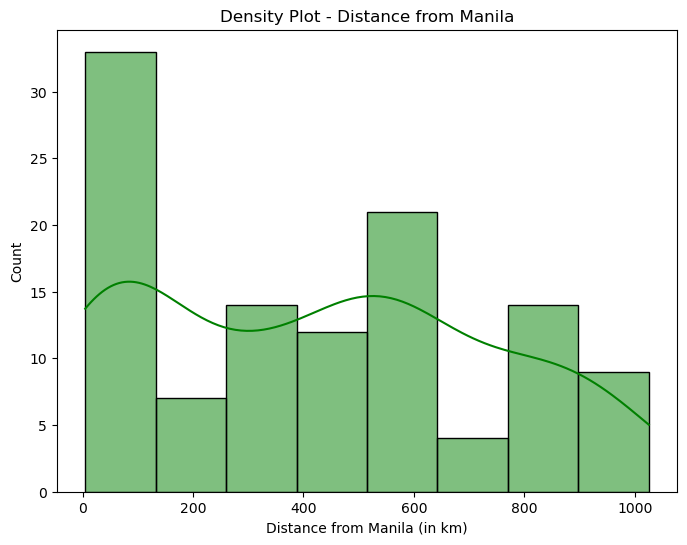

In [9]:
# Create density plots 

#'OVERALL SCORE'
plt.figure(figsize=(8, 6))
sns.histplot(data['OVERALL SCORE'], kde=True, color='blue')
plt.xlabel('Overall Score')
plt.title('Density Plot - Overall Score')
plt.show()

#'ECONOMIC DYNAMISM SCORE'
plt.figure(figsize=(8, 6))
sns.histplot(data['ECONOMIC DYNAMISM SCORE'], kde=True, color='red')
plt.xlabel('ECONOMIC DYNAMISM SCORE')
plt.title('Density Plot - ECONOMIC DYNAMISM SCORE')
plt.show()

#'GOVERNMENT EFFICIENCY SCORE'
plt.figure(figsize=(8, 6))
sns.histplot(data['GOVERNMENT EFFICIENCY SCORE'], kde=True, color='violet')
plt.xlabel('GOVERNMENT EFFICIENCY SCORE')
plt.title('Density Plot - GOVERNMENT EFFICIENCY SCORE')
plt.show()

#'INFRASTRUCTURE SCORE'
plt.figure(figsize=(8, 6))
sns.histplot(data['INFRASTRUCTURE SCORE'], kde=True, color='pink')
plt.xlabel('INFRASTRUCTURE SCORE')
plt.title('Density Plot - INFRASTRUCTURE SCORE')
plt.show()

#'RESILIENCY SCORE'
plt.figure(figsize=(8, 6))
sns.histplot(data['RESILIENCY SCORE'], kde=True, color='yellow')
plt.xlabel('RESILIENCY SCORE')
plt.title('Density Plot - RESILIENCY SCORE')
plt.show()

#'INNOVATION SCORE'
plt.figure(figsize=(8, 6))
sns.histplot(data['INNOVATION SCORE'], kde=True, color='orange')
plt.xlabel('INNOVATION SCORE')
plt.title('Density Plot - INNOVATION SCORE')
plt.show()


#'GEOCENTRIC DISTANCE FROM MANILA (IN KM)'
plt.figure(figsize=(8, 6))
sns.histplot(data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)'], kde=True, color='green')
plt.xlabel('Distance from Manila (in km)')
plt.title('Density Plot - Distance from Manila')
plt.show()

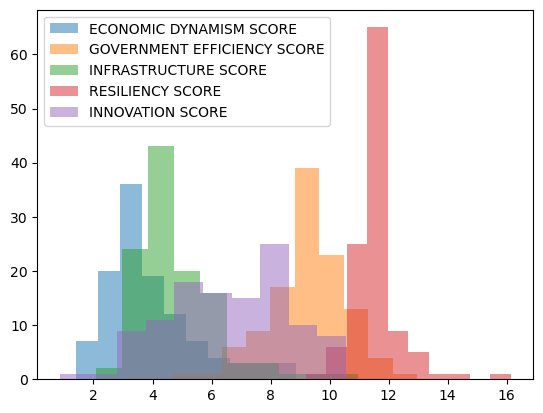

In [10]:
# Check the scores per pillar 

plt.hist(data['ECONOMIC DYNAMISM SCORE'], alpha=.5, label='ECONOMIC DYNAMISM SCORE')
plt.hist(data['GOVERNMENT EFFICIENCY SCORE'], alpha=.5, label='GOVERNMENT EFFICIENCY SCORE')
plt.hist(data['INFRASTRUCTURE SCORE'], alpha=.5, label='INFRASTRUCTURE SCORE')
plt.hist(data['RESILIENCY SCORE'], alpha=.5, label='RESILIENCY SCORE')
plt.hist(data['INNOVATION SCORE'], alpha=.5, label='INNOVATION SCORE')
plt.legend()

# Inferential Statistics: Data Visualization & Analysis

In this section, the dataset was processed through a series of tests, namely Pearson correlation, Ordinary Least Squares regression (OLS), Mean Squared Error and logarithmic transformations, to be discussed further below.


In [11]:
#Pearson correlation
dependent_variables = ['OVERALL SCORE','ECONOMIC DYNAMISM SCORE', 'GOVERNMENT EFFICIENCY SCORE', 'INFRASTRUCTURE SCORE', 'RESILIENCY SCORE', 'INNOVATION SCORE']

for var in dependent_variables:
    correlation_coefficient, p_value = pearsonr(data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)'], data[var])
    print(f"Correlation Coefficient ({var}):", correlation_coefficient)
    print(f"P-value ({var}):", p_value)
    print(" ")


Correlation Coefficient (OVERALL SCORE): -0.2747231662151971
P-value (OVERALL SCORE): 0.003095910693561699
 
Correlation Coefficient (ECONOMIC DYNAMISM SCORE): -0.3298210333381713
P-value (ECONOMIC DYNAMISM SCORE): 0.0003389788565796336
 
Correlation Coefficient (GOVERNMENT EFFICIENCY SCORE): -0.2180191451752896
P-value (GOVERNMENT EFFICIENCY SCORE): 0.01979246899916669
 
Correlation Coefficient (INFRASTRUCTURE SCORE): -0.24345189272579573
P-value (INFRASTRUCTURE SCORE): 0.0090515083324293
 
Correlation Coefficient (RESILIENCY SCORE): -0.16355659791621854
P-value (RESILIENCY SCORE): 0.08207165103979633
 
Correlation Coefficient (INNOVATION SCORE): -0.16786617057677575
P-value (INNOVATION SCORE): 0.07421936129270425
 


`First, the Pearson’s test is utilized to check the direction and significance of the relationship between the competitiveness indicators and geocentric distance from Manila. All relationships are significant at an alpha level of 10% but only three variables would be left significant at the standardized alpha level of 5%. All pillars of the competitiveness index  negatively correspond to the geocentric distance from Manila by around 0.16 to 0.32 points. This implies that for every unit increase in the geocentric distance, the competitiveness index decreases consequently. For example, for every unit increase in geocentric distance from Manila by kilometers, the economic dynamism score decreases by 0.329821.`

In [12]:
# OLS Regression Results
dependent_variables = ['OVERALL SCORE','ECONOMIC DYNAMISM SCORE', 'GOVERNMENT EFFICIENCY SCORE', 'INFRASTRUCTURE SCORE', 'RESILIENCY SCORE', 'INNOVATION SCORE']

for var in dependent_variables:
    X = data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)']
    y = data[var]

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    print(f"Summary for {var}:")
    print(model.summary())
    print(" ")
    print(" ")
    print(" ")
    print(" ")


Summary for OVERALL SCORE:
                            OLS Regression Results                            
Dep. Variable:          OVERALL SCORE   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     9.143
Date:                Mon, 11 Dec 2023   Prob (F-statistic):            0.00310
Time:                        11:58:40   Log-Likelihood:                -357.30
No. Observations:                 114   AIC:                             718.6
Df Residuals:                     112   BIC:                             724.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

`To further investigate consistency in the results from the pearson test, we have opted to do an Ordinary Least Squares regression. Under an OLS regression, we are essentially estimating the statistical relationship of a dependent variable and one or more independent variables. In this case, from a sample of 114 component cities, we are assessing how geocentric distance from Manila is able to determine a predicted value for the 5 competitiveness indicators.`

`Results indicate that distance from manila consistently has a negative relationship with the outcome variables, meaning that the greater the distance from manila, there is evidently less economic development, industrial presence, government efficiency and infrastructure. These results are significant at a 5% level of significance for the overall competitiveness score, and indicator scores such as economic dynamism, government efficiency, and infrastructure scores while it is only significant at a 10% level of significance for resilience and innovation scores.`

`However, residuals from all indicators, except for the innovation score, are not normally distributed. The Jarque-Bera test for normality indicates strong evidence that the results may be biased and unreliable since there may be factors not included in the model that significantly influence the relationship between the indicators and distance from Manila. This is supported by findings under the Omnibus test. Similar to the Jarque-Bera test, the test checks whether there is normal distribution of residuals. At a p-value that is less than 0.05, the test indicates that there is evidence to suggest that residuals are not normally distributed while at a p-value greater than 0.05, the findings imply that the residuals are normally distributed.`

In [13]:
#X and Y
dependent_vars = []
coefficients = []

dependent_variables = ['OVERALL SCORE','ECONOMIC DYNAMISM SCORE', 'GOVERNMENT EFFICIENCY SCORE', 'INFRASTRUCTURE SCORE', 'RESILIENCY SCORE', 'INNOVATION SCORE']

for var in dependent_variables:
    X = data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)']
    y = data[var]

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    coefficient = model.params[1]
    p_value = model.pvalues[1]

    coefficient_pvalue = f"{coefficient:.4f}  ({p_value:.4f})"

    dependent_vars.append(var)
    coefficients.append(coefficient_pvalue)

coefficients_table = pd.DataFrame({'Dependent Variable': dependent_vars, 'X and Y': coefficients})

#Log(X) and Y
dependent_vars = []
coefficients = []

for var in dependent_variables:
    X = np.log(data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)'])
    y = data[var]

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    coefficient = model.params[1]
    p_value = model.pvalues[1]

    coefficient_pvalue = f"{coefficient:.4f}  ({p_value:.4f})"

    dependent_vars.append(var)
    coefficients.append(coefficient_pvalue)

coefficients_table['Log(X) and Y'] = coefficients

#X and Log(Y)
dependent_vars = []
coefficients = []

for var in dependent_variables:
    X = data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)']
    y = np.log(data[var])

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    coefficient = model.params[1]
    p_value = model.pvalues[1]

    coefficient_pvalue = f"{coefficient:.4f}  ({p_value:.4f})"

    dependent_vars.append(var)
    coefficients.append(coefficient_pvalue)

coefficients_table['X and Log(Y)'] = coefficients

#Log(X) and Log(Y)
dependent_vars = []
coefficients = []

for var in dependent_variables:
    X = np.log(data['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)'])
    y = np.log(data[var])

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    coefficient = model.params[1]
    p_value = model.pvalues[1]

    coefficient_pvalue = f"{coefficient:.4f}  ({p_value:.4f})"

    dependent_vars.append(var)
    coefficients.append(coefficient_pvalue)

coefficients_table['Log(X) and Log(Y)'] = coefficients
coefficients_table.to_excel('coefficients_table.xlsx', index=False)
coefficients_table


,Dependent Variable,X and Y,Log(X) and Y,X and Log(Y),Log(X) and Log(Y)
0,OVERALL SCORE,-0.0051 (0.0031),-1.4198 (0.0003),-0.0001 (0.0032),-0.0385 (0.0002)
1,ECONOMIC DYNAMISM SCORE,-0.0016 (0.0003),-0.4980 (0.0000),-0.0003 (0.0016),-0.1115 (0.0000)
2,GOVERNMENT EFFICIENCY SCORE,-0.0009 (0.0198),-0.1998 (0.0206),-0.0001 (0.0221),-0.0228 (0.0218)
3,INFRASTRUCTURE SCORE,-0.0011 (0.0091),-0.3038 (0.0011),-0.0002 (0.0078),-0.0618 (0.0005)
4,RESILIENCY SCORE,-0.0004 (0.0821),-0.0951 (0.0882),-0.0000 (0.0758),-0.0083 (0.0701)
5,INNOVATION SCORE,-0.0011 (0.0742),-0.3231 (0.0194),-0.0002 (0.0780),-0.0567 (0.0246)


`Hence, we opted to transform the variables in logarithmic form to account for normal distribution of the residual. By changing the variables in logarithmic form, we attempt to isolate the relationship between the dependent and independent variables from the influence of factors not included in the model. The findings relatively remained the same. All models indicate that there is a consistently significant negative relationship with distance from Manila with the overall score and the 5 indicators. However, this level of significance varies for resiliency and innovation scores.`

In [14]:
dependent_variables = ['OVERALL SCORE','ECONOMIC DYNAMISM SCORE', 'GOVERNMENT EFFICIENCY SCORE', 'INFRASTRUCTURE SCORE', 'RESILIENCY SCORE', 'INNOVATION SCORE']

mse_table = pd.DataFrame({'Dependent Variable': dependent_variables})
random_seed = 42
# X and Y
mse_values = []
for var in dependent_variables:
    X = data[['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)']]
    y = data[var]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

mse_table['X and Y'] = mse_values

# Log(X) and Y
mse_values_log_x = []
for var in dependent_variables:
    X = np.log(data[['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)']])
    y = data[var]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values_log_x.append(mse)

mse_table['Log(X) and Y'] = mse_values_log_x

# X and Log(Y)
mse_values_x_log_y = []
for var in dependent_variables:
    X = data[['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)']]
    y = np.log(data[var])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
    mse_values_x_log_y.append(mse)

mse_table['X and Log(Y)'] = mse_values_x_log_y

# Log(X) and Log(Y)
mse_values_log_x_log_y = []
for var in dependent_variables:
    X = np.log(data[['GEOCENTRIC DISTANCE FROM MANILA  (IN KM)']])
    y = np.log(data[var])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
    mse_values_log_x_log_y.append(mse)

mse_table['Log(X) and Log(Y)'] = mse_values_log_x_log_y
mse_table.to_excel('mse_table.xlsx', index=False)
mse_table

,Dependent Variable,X and Y,Log(X) and Y,X and Log(Y),Log(X) and Log(Y)
0,OVERALL SCORE,40.339873,40.641502,41.312538,41.813083
1,ECONOMIC DYNAMISM SCORE,2.090319,2.010186,2.230086,2.171520
2,GOVERNMENT EFFICIENCY SCORE,2.132123,2.178132,2.177633,2.234005
3,INFRASTRUCTURE SCORE,2.774776,2.777255,2.827930,2.848838
4,RESILIENCY SCORE,0.911939,0.931845,0.916565,0.935660
5,INNOVATION SCORE,3.761501,3.751940,4.189469,4.244104


`Lastly, we tested for the Mean Square Error to measure the difference between the predicted and actual values of the indicators when we use the geocentric distance from Manila as a determinant variable. By splitting the dataset to training and testing sets, we generate predicted values of the dependent variable from a linear regression model using 80% of the sample while 20% will be used as the actual values of the dependent variable to evaluate the accuracy of the estimation. In a nutshell, from the difference of these predicted and actual values, we generate scores of mean square error where if the MSE is high, there are large prediction errors while low MSEs indicate better predictive performance.`

`The findings indicate that there are low MSE results across all models, implying that geodistance for Manila is able to accurately predict the actual value of the 5 indicators. However, it should be noted that the overall score has a comparatively large prediction error, suggesting other factors, beyond geocentric distance, may influence the competitiveness of a city.`

# Summary of Findings and Recommendations

`In summary, the findings postulate strong evidence for the existence of the ‘imperial Manila Syndrome.’ From the exploratory analysis to the inferential statistics, we find that geocentric distance from Metro Manila has a negative influence on the competitiveness of component cities. The results show that there is a concentration of economic and political activity in areas closer to the capital, leaving distant cities to lag behind in competition and development based on the 5 competitiveness indicators that are economic dynamism, government efficiency, infrastructure, resiliency, and innovation. Consequently, policy recommendations should be guided into two ways.` 

`First, there is a need for fair distribution of taxes across regions to fund development. This will promote job creation and an influx of investment and industrial presence that will address regional and provincial inequality. Implementing a progressive tax system can ensure contributions in redistributing resources from prosperous areas to those that need it more, fostering balanced growth.`

`Moreover, there is a need to reevaluate policies that are pursuing federalism to restructure political influence that is heavily concentrated in the capital government. Motivations for this restructuring argue that this will allow regions to specialize on products and services that will promote innovation and trade while giving local governments the political power to address needs specific to their locality. For example, offering tax incentives and other benefits to invest in underdeveloped regions can stimulate economic growth through attracting industries to set up operations in areas that are lagging behind, thus creating job opportunities for the local population.`

`Truly, it is beneficial to regularly evaluate the effectiveness of interventions and adjust policies accordingly to ensure they are achieving the desired outcomes. `

# Reference 

Tusalem, R. F. (2020). Imperial Manila: How institutions and political geography disadvantage Philippine provinces. Asian Journal of Comparative Politics, 5(3), 235-269. https://doi.org/10.1177/2057891119841441 